# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2384 Исмаилов Максим Владимирович и Дамакин Роман Павлович. Вариант №15.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Дискретные нерекурсивный фильтр представляет собой фильтр, в котором выходной сигнал на текущем шаге времени зависит только от конечного набора предыдущих входных значений. Такой фильтр часто используется для обработки временных рядов, где требуется сглаживание или подавление высокочастотных составляющих.




## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.



#Порядок выполнения работы

1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики  $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.


## Выполнение работы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Задание 1

Выходной сигнал: $y(t) = A + Bt$

***Для 3 точек:***

Оценим **A** и **B** методом наименьших квадратов:

$F(A,B) = \sum_{k=-1}^{k=1} (s_k - y_k)^2 = \sum_{k=-1}^{k=1} (s_k - A - Bk)^2$

Берем частные производные по **A** и **B**, получаем нормальные уравнения:

$ \begin{cases}
3A = \sum_{k=-1}^{k=1} s_k \\
2B = \sum_{k=-1}^{k=1} ks_k
\end{cases} $

Отсюда:

$y_0 = A = \frac{1}{3} \sum_{k=-1}^{k=1} s_k$

В общем виде:

$y_n = \frac{1}{3} \sum_{k=n-1}^{k=n+1} s_k = \frac{1}{3} (s_{n-1} + s_{n} + s_{n+1})$

Пусть $s_n = e^{iwn}$, тогда:

$y_n = \frac{1}{3} (e^{iw(n-1)} + e^{iwn} + e^{iw(n+1)}) = \frac{1}{3} (e^{-iw} + 1 + e^{iw}) e^{iwn} = H(w)e^{iwn}$

Следовательно:

$H(w) = \frac{1}{3} (e^{-iw} + 1 + e^{iw}) = \frac{1}{3} (1 + 2cos(w))$

***Для 5 точек:***

$H(w) = \frac{1}{5} (e^{-2iw} + e^{-iw} + 1 + e^{iw} + e^{2iw}) = \frac{1}{5} (1 + 2cos(w) + 2cos(2w))$

***Для 7 точек:***

$H(w) = \frac{1}{7} (e^{-3iw} + e^{-2iw} + e^{-iw} + 1 + e^{iw} + e^{2iw} + e^{3iw}) = \frac{1}{7} (1 + 2cos(w) + 2cos(2w) + 2cos(3w))$

***Для 9 точек:***

$H(w) = \frac{1}{9} (e^{-4iw} + e^{-3iw} + e^{-2iw} + e^{-iw} + 1 + e^{iw} + e^{2iw} + e^{3iw} + e^{4iw}) = \frac{1}{9} (1 + 2cos(w) + 2cos(2w) + 2cos(3w) + 2cos(4w))$

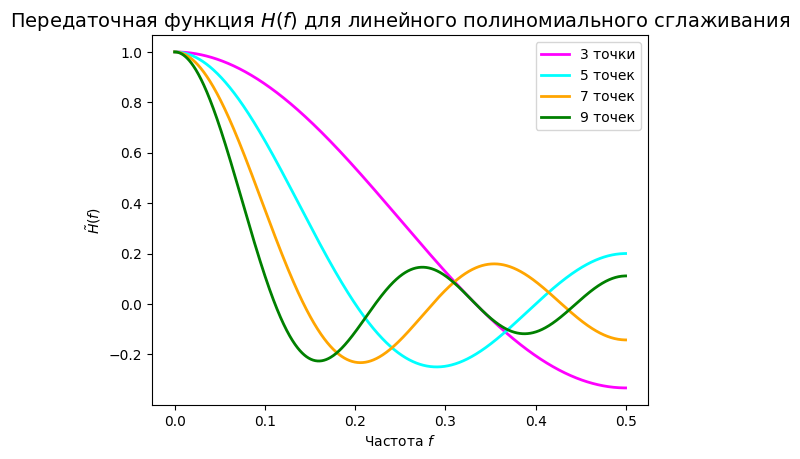

In [ ]:
# Функции для полиномиального сглаживания

# Линейная аппроксимация с 3, 5, 7 и 9 точками
def H_linear_3(w):
    return (1 + 2*cos(w)) / 3

def H_linear_5(w):
    return (1 + 2*cos(w) + 2*cos(2*w)) / 5

def H_linear_7(w):
    return (1 + 2*cos(w) + 2*cos(2*w) + 2*cos(3*w)) / 7

def H_linear_9(w):
    return (1 + 2*cos(w) + 2*cos(2*w) + 2*cos(3*w) + 2*cos(4*w)) / 9

# Определение диапазонов частот
N = 2048
F = [f / N for f in range(N)][:N // 2]
W = [2 * math.pi * f for f in F]

# Вычисление значений для линейной аппроксимации
linear_3 = [H_linear_3(w) for w in W]
linear_5 = [H_linear_5(w) for w in W]
linear_7 = [H_linear_7(w) for w in W]
linear_9 = [H_linear_9(w) for w in W]

# Построение графиков линейных аппроксимаций
plt.plot(F, linear_3, label='3 точки', color='magenta', linewidth=2)
plt.plot(F, linear_5, label='5 точек', color='cyan', linewidth=2)
plt.plot(F, linear_7, label='7 точек', color='orange', linewidth=2)
plt.plot(F, linear_9, label='9 точек', color='green', linewidth=2)

plt.xlabel('Частота $f$')
plt.ylabel('$\\tilde{H}(f)$')
plt.title('Передаточная функция $H(f)$ для линейного полиномиального сглаживания', fontsize=14)
plt.legend()
plt.show()

**Свойства передаточной функции при линейном сглаживании**

*   **Нулевая частота (f = 0)**
    *   `|H(0)| = 1`
    *   Постоянная составляющая сигнала сохраняется

*   **Зависимость от размера окна (N)**
    *   N = 3, 5: Широкая полоса пропускания, слабое сглаживание
    *   N = 7, 9: Узкая полоса пропускания, сильное сглаживание

*   **Высокочастотная область**
    *   `|H(f)|` уменьшается с ростом частоты
    *   Быстрые изменения сигнала подавляются

## Задание 2

Выходной сигнал: $y(t) = A + Bt + Ct^2$

***Для 7 точек:***

Ищем **A**,**B**,**C** методом наименьших квадратов:

$F(A,B,C) = \sum_{k=-3}^{k=3} (s_k - y_k)^2 = \sum_{k=-3}^{k=3} (s_k - A - Bk - Ck^2)^2$

Берем частные производные по **A**,**B**,**C** получаем нормальные уравнения:

$ \begin{cases}
7A + 28C = \sum_{k=-3}^{k=3} s_k \\
28B = \sum_{k=-3}^{k=3} ks_k \\
28A + 196C = \sum_{k=-3}^{k=3} k^2 s_k
\end{cases} $

Вычитая из третьего уравнения первое, умноженное на 7, получаем:

$-21A = 2s_{-3} - 3s_{-2} - 6s_{-1} - 7s_{0} - 6s_{1} - 3s_{2} + 2s_{3}$

Отсюда:

$y_0 = A = \frac{1}{21} (-2s_{-3} + 3s_{-2} + 6s_{-1} + 7s_{0} + 6s_{1} + 3s_{2} - 2s_{3})$

В общем случае:

$y_n = \frac{1}{21} (-2s_{n-3} + 3s_{n-2} + 6s_{n-1} + 7s_{n} + 6s_{n+1} + 3s_{n+2} - 2s_{n+3})$

Пусть $s_n = e^{iwn}$, тогда:

$y_n = \frac{1}{21} (-2e^{-3iw} + 3e^{-2iw} + 6e^{-iw} + 7 + 6e^{iw}+ 3e^{2iw} - 2e^{3iw}) e^{iwn} = H(w)e^{iwn}$

Следовательно:

$H(w) = \frac{1}{21} (-2e^{-3iw} + 3e^{-2iw} + 6e^{-iw} + 7 + 6e^{iw}+ 3e^{2iw} - 2e^{3iw}) = \frac{1}{21} (7 + 12cos(w) + 6cos(2w) - 4cos(3w))$

***Для 9 точек:***

$H(w) = \frac{1}{231} (59 + 108cos(w) + 78cos(2w) + 28cos(3w) - 42cos(4w))$

***Для 11 точек:***

$H(w) = \frac{1}{429} (89 + 168cos(w) + 138cos(2w) + 88cos(3w) + 18cos(4w) - 72cos(5w))$

***Для 13 точек:***

$H(w) = \frac{1}{143} (25 + 48cos(w) + 42cos(2w) + 32cos(3w) + 18cos(4w) - 22cos(6w))$

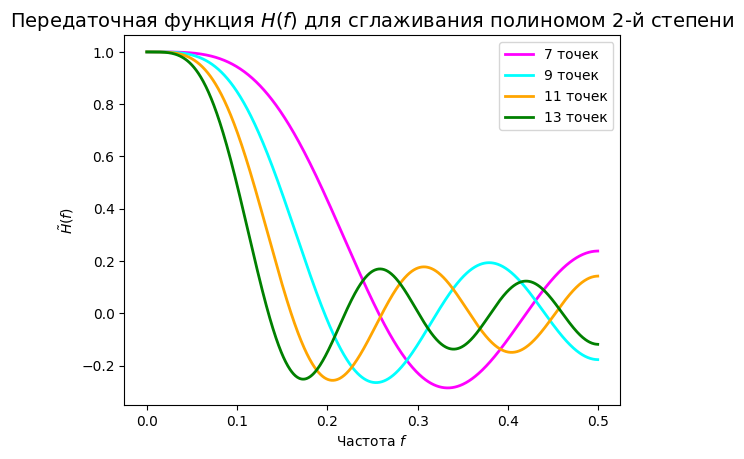

In [ ]:
# Функции для сглаживания полиномом 2-й степени
def H_quad_7(w):
    return (7 + 12*cos(w) + 6*cos(2*w) - 4*cos(3*w)) / 21

def H_quad_9(w):
    return (59 + 108*cos(w) + 78*cos(2*w) + 28*cos(3*w) - 42*cos(4*w)) / 231

def H_quad_11(w):
    return (89 + 168*cos(w) + 138*cos(2*w) + 88*cos(3*w) + 18*cos(4*w) - 72*cos(5*w)) / 429

def H_quad_13(w):
    return (25 + 48*cos(w) + 42*cos(2*w) + 32*cos(3*w) + 18*cos(4*w) - 22*cos(6*w)) / 143

quad_7 = [H_quad_7(w) for w in W]
quad_9 = [H_quad_9(w) for w in W]
quad_11 = [H_quad_11(w) for w in W]
quad_13 = [H_quad_13(w) for w in W]

plt.plot(F, quad_7, label='7 точек', color='magenta', linewidth=2)
plt.plot(F, quad_9, label='9 точек', color='cyan', linewidth=2)
plt.plot(F, quad_11, label='11 точек', color='orange', linewidth=2)
plt.plot(F, quad_13, label='13 точек', color='green', linewidth=2)

plt.xlabel('Частота $f$')
plt.ylabel('$\\tilde{H}(f)$')
plt.title('Передаточная функция $H(f)$ для сглаживания полиномом 2-й степени', fontsize=14)
plt.legend()
plt.show()

**Свойства передаточной функции при сглаживании полиномом 2-й степени**

*   **Нулевая частота (f = 0)**
    *   `|H(0)| = 1`
    *   Постоянная составляющая сигнала сохраняется

*   **Зависимость от размера окна (N)**
    *   N = 7, 9: Широкая полоса пропускания, слабое сглаживание
    *   N = 11, 13: Узкая полоса пропускания, сильное сглаживание

*   **Высокочастотная область**
    *   `|H(f)|` уменьшается с ростом частоты
    *   Быстрые изменения и шумы подавляются

*   **Боковые колебания**
    *   Наблюдаются незначительные колебания амплитуды
    *   Уменьшаются с увеличением N

## Задание 3

Выходной сигнал: $y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$

***Для 9 точек:***

Для нахождения коэфффициентов **A**, **B**, **C**, **D** и **E** воспользуемся методом наименьших квадратов:

$F(A,B,C,D,E) = \sum_{k=-4}^{k=4} (s_k - y_k)^2 = \sum_{k=-4}^{k=4} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2$

Берем частные производные по **A**, **B**, **C**, **D** и **E**, получаем систему нормальных уравнений:

$ \begin{cases}
9A + 60C + 708E = \sum_{k=-4}^{k=4} s_k \\
60B + 708D = \sum_{k=-4}^{k=4} ks_k \\
60A + 708C + 9780E = \sum_{k=-4}^{k=4} k^2 s_k \\
708B + 9780D = \sum_{k=-4}^{k=4} k^3 s_k \\
708A + 9780C + 144708E = \sum_{k=-4}^{k=4} k^4 s_k
\end{cases} $

В результате:

$y_0 = A = \frac{1}{429} (15s_{-4} - 55s_{-3} + 30s_{-2} + 135s_{-1} + 179s_{0} + 135s_{1} + 30s_{2} - 55s_{3} + 15s_{4})$

В общем случае:

$y_n = \frac{1}{429} (15s_{n-4} - 55s_{n-3} + 30s_{n-2} + 135s_{n-1} + 179s_{n} + 135s_{n+1} + 30s_{n+2} - 55s_{n+3} + 15s_{n+4})$

Пусть $s_n = e^{iwn}$, тогда:

$y_n = \frac{1}{429} (15e^{-4iw} - 55e^{-3iw} + 30e^{-2iw} + 135e^{-iw} + 179 + 135e^{iw} + 30e^{2iw} - 55e^{3iw} + 15e^{4iw}) e^{iwn} = H(w)e^{iwn}$

Следовательно:

$H(w) = \frac{1}{429} (179 + 270cos(w) + 60cos(2w) - 110cos(3w) + 30cos(4w))$

***Для 11 точек:***

$H(w) = \frac{1}{429} (143 + 240cos(w) + 120cos(2w) - 20cos(3w) - 90cos(4w) + 36cos(5w))$

***Для 13 точек:***

$H(w) = \frac{1}{2431} (677 + 1200cos(w) + 780cos(2w) + 220cos(3w) - 270cos(4w) - 396cos(5w) + 220cos(6w))$

***Для 15 точек:***

$H(w) = \frac{1}{46189} (11063 + 20250cos(w) + 15000cos(2w) + 7510cos(3w) - 330cos(4w) - 5874cos(5w) - 5720cos(6w) + 4290cos(7w))$

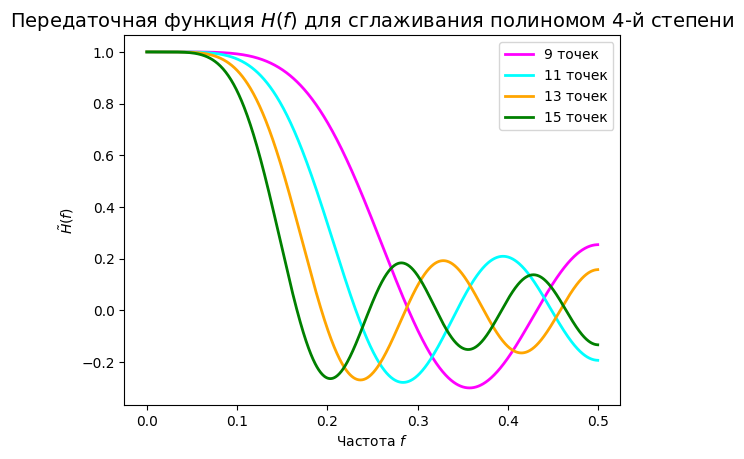

In [ ]:
# Функции для сглаживания полиномом 4-й степени
def H_poly4_9(w):
    return (179 + 270 * np.cos(w) + 60 * np.cos(2 * w) - 110 * np.cos(3 * w) + 30 * np.cos(4 * w)) / 429

def H_poly4_11(w):
    return (143 + 240 * np.cos(w) + 120 * np.cos(2 * w) - 20 * np.cos(3 * w) - 90 * np.cos(4 * w) + 36 * np.cos(5 * w)) / 429

def H_poly4_13(w):
    return (677 + 1200 * np.cos(w) + 780 * np.cos(2 * w) + 220 * np.cos(3 * w) - 270 * np.cos(4 * w) - 396 * np.cos(5 * w) + 220 * np.cos(6 * w)) / 2431

def H_poly4_15(w):
    return (11063 + 20250 * np.cos(w) + 15000 * np.cos(2 * w) + 7510 * np.cos(3 * w) - 330 * np.cos(4 * w) - 5874 * np.cos(5 * w) - 5720 * np.cos(6 * w) + 4290 * np.cos(7 * w)) / 46189

# Значения функций
H9_poly4 = [H_poly4_9(w) for w in W]
H11_poly4 = [H_poly4_11(w) for w in W]
H13_poly4 = [H_poly4_13(w) for w in W]
H15_poly4 = [H_poly4_15(w) for w in W]

# График передаточной функции при сглаживании полиномом четвертой степени по 9, 11, 13 и 15 точкам
plt.figure()
plt.plot(F, H9_poly4, label='9 точек', color='magenta', linewidth=2)
plt.plot(F, H11_poly4, label='11 точек', color='cyan', linewidth=2)
plt.plot(F, H13_poly4, label='13 точек', color='orange', linewidth=2)
plt.plot(F, H15_poly4, label='15 точек', color='green', linewidth=2)

plt.xlabel('Частота $f$')
plt.ylabel('$\\tilde{H}(f)$')
plt.title('Передаточная функция $H(f)$ для сглаживания полиномом 4-й степени', fontsize=14)
plt.legend()
plt.show()

**Свойства передаточной функции при сглаживании полиномом 4-й степени**

*   **Зависимость от размера окна (N)**
    *   N = 9, 11: Широкая полоса пропускания, слабое подавление шумов
    *   N = 13, 15: Узкая полоса пропускания, сильное подавление шумов

*   **Низкочастотная область**
    *   Широкая полоса с коэффициентом передачи близким к 1
    *   `|H(f)| ≈ 1` в окрестности нулевой частоты

*   **Структура АЧХ**
    *   Симметричная относительно оси частот
    *   `|H(0)| = 1`
    *   Количество осцилляций определяется числом точек


## Задание 4

Формула Спенсера для 15 точек:

$y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$

Формула Спенсера для 21 точки:

$y_n = \frac{1}{350} (-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - s_{n+10})$

Следовательно:


***Для 15 точек:***

$H(w) = \frac{1}{320} (74 + 134cos(w) + 92cos(2w) + 42cos(3w) + 6cos(4w) - 10cos(5w) - 12cos(6w) - 6cos(7w))$

***Для 21 точки:***

$H(w) = \frac{1}{350} (60 + 114cos(w) + 94cos(2w) + 66cos(3w) + 36cos(4w) + 12cos(5w) - 4cos(6w) - 10cos(7w) - 10cos(8w) - 6cos(9w) - 2cos(10w))$



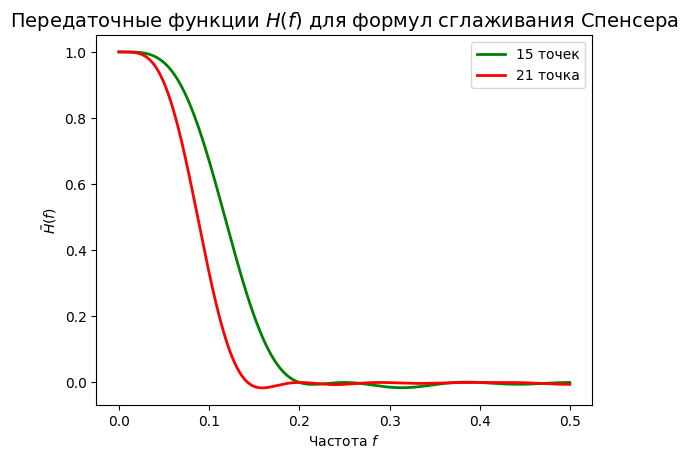

In [ ]:
# Формулы сглаживания Спенсера
def H_Spencer_15(w):
    return (74 + 134*cos(w) + 92*cos(2*w) + 42*cos(3*w) + 6*cos(4*w) - 10*cos(5*w) - 12*cos(6*w) - 6*cos(7*w)) / 320

def H_Spencer_21(w):
    return (60 + 114*cos(w) + 94*cos(2*w) + 66*cos(3*w) + 36*cos(4*w) + 12*cos(5*w) - 4*cos(6*w) - 10*cos(7*w) - 10*cos(8*w) - 6*cos(9*w) - 2*cos(10*w)) / 350

spencer_15 = [H_Spencer_15(w) for w in W]
spencer_21 = [H_Spencer_21(w) for w in W]

plt.plot(F, spencer_15, label='15 точек', color='green', linestyle='-', linewidth=2)
plt.plot(F, spencer_21, label='21 точка', color='red', linestyle='-', linewidth=2)

plt.xlabel('Частота $f$')
plt.ylabel('$\\tilde{H}(f)$')
plt.title('Передаточные функции $H(f)$ для формул сглаживания Спенсера', fontsize=14)
plt.legend()
plt.show()

**Свойства передаточной функции фильтров Спенсера**

*   **Нулевая частота (f = 0)**
    *   `|H(0)| = 1`
    *   Постоянная составляющая сохраняется полностью

*   **Низкочастотная область**
    *   Хорошо сохраняются низкочастотные компоненты сигнала

*   **Высокочастотная область**
    *   Эффективно подавляются высокочастотные шумы

*   **Зависимость от количества точек**
    *   15 точек: Лучше отслеживает быстрые изменения
    *   21 точка: Уже полоса пропускания, сильнее подавление шумов


## Задание 5

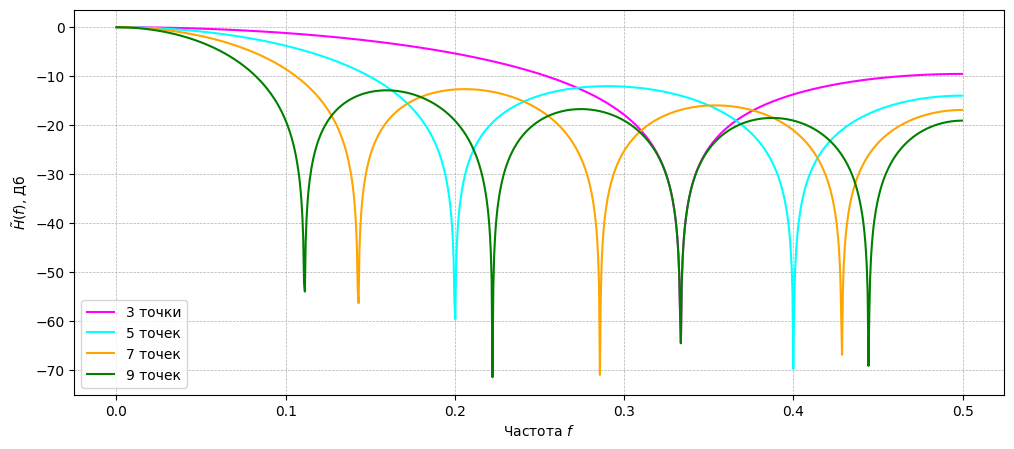

In [ ]:
# График передаточной функции при сглаживании прямой линией по 3, 5, 7 и 9 точкам в логарифмической шкале
plt.figure(figsize=(12,5))
poly1_log = {
    '3 точки': [20 * log10(abs(h)) for h in linear_3],
    '5 точек': [20 * log10(abs(h)) for h in linear_5],
    '7 точек': [20 * log10(abs(h)) for h in linear_7],
    '9 точек': [20 * log10(abs(h)) for h in linear_9]
}

colors = ['magenta', 'cyan', 'orange', 'green']

for i, (label, data) in enumerate(poly1_log.items()):
  plt.plot(F, data, label=label, color=colors[i])

plt.xlabel('Частота $f$')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

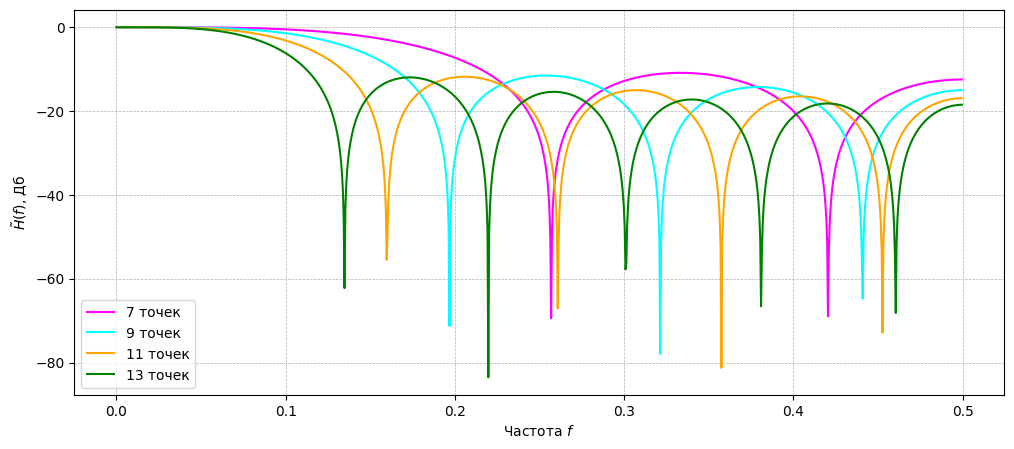

In [ ]:
# График передаточной функции при сглаживании полиномом второй степени по 9, 11, 13 и 15 точкам в логарифмической шкале
plt.figure(figsize=(12,5))
poly1_log = {
    '7 точек': [20 * log10(abs(h)) for h in quad_7],
    '9 точек': [20 * log10(abs(h)) for h in quad_9],
    '11 точек': [20 * log10(abs(h)) for h in quad_11],
    '13 точек': [20 * log10(abs(h)) for h in quad_13]
}

colors = ['magenta', 'cyan', 'orange', 'green']

for i, (label, data) in enumerate(poly1_log.items()):
  plt.plot(F, data, label=label, color=colors[i])

plt.xlabel('Частота $f$')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


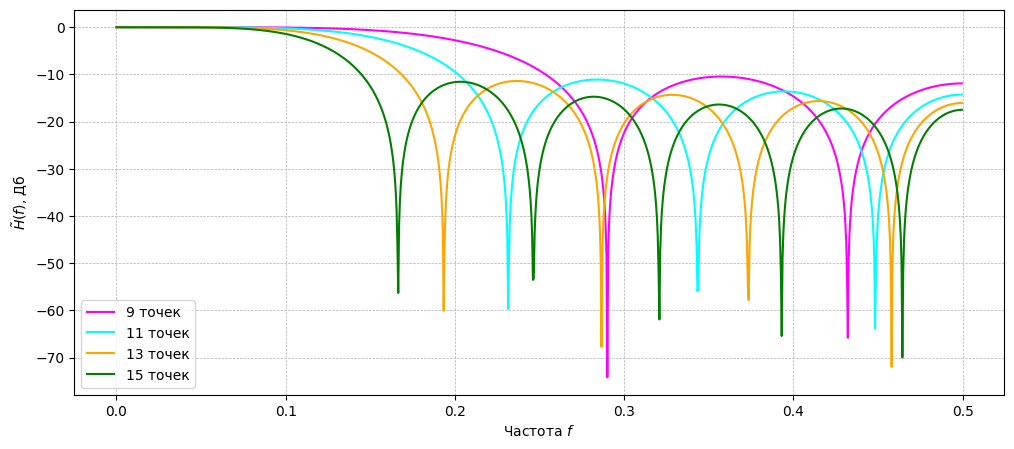

In [ ]:
# График передаточной функции при сглаживании полиномом четвертой степени по 9, 11, 13 и 15 точкам в логарифмической шкале
plt.figure(figsize=(12,5))
poly4_log = {
    '9 точек': [20 * log10(abs(h)) for h in H9_poly4],
    '11 точек': [20 * log10(abs(h)) for h in H11_poly4],
    '13 точек': [20 * log10(abs(h)) for h in H13_poly4],
    '15 точек': [20 * log10(abs(h)) for h in H15_poly4]
}

colors = ['magenta', 'cyan', 'orange', 'green']

for i, (label, data) in enumerate(poly4_log.items()):
  plt.plot(F, data, label=label, color=colors[i])

plt.xlabel('Частота $f$')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

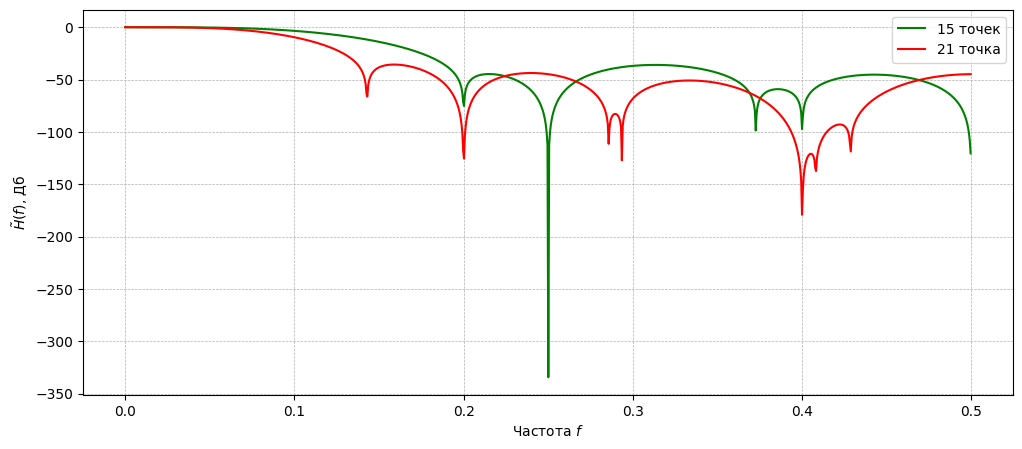

In [ ]:
# График передаточной функции при сглаживании по формулам Спенсера для 15 и 21 точек в логарифмической шкале
plt.figure(figsize=(12,5))
spencer_log = {
    '15 точек': [20 * log10(abs(h)) for h in spencer_15],
    '21 точка': [20 * log10(abs(h)) for h in spencer_21]
}

colors = ['green', 'red']

for i, (label, data) in enumerate(spencer_log.items()):
  plt.plot(F, data, label=label, color=colors[i])

plt.xlabel('Частота $f$')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

**Сравнение шкал и характеристик фильтров**

*   **Линейная шкала**
    *   Абсолютные значения (0...1)
    *   Плавное уменьшение коэффициента передачи

*   **Логарифмическая шкала**
    *   Относительные изменения в дБ (-∞...0)
    *   Показывает реальную глубину подавления

*   **Сравнение фильтров**
    *   Больше точек → уже полоса пропускания
    *   Высшие порядки полиномов → круче спад АЧХ
    *   Фильтры Спенсера → лучшее подавление высоких частот


## Задание 6

**Сравнительный анализ фильтров**

*   **Общие характеристики**
    *   У всех фильтров: резкий спад АЧХ при увеличении точек
    *   Сильное подавление высоких частот при больших N

*   **Влияние степени полинома**
    *   С ростом степени: увеличивается пропускная полоса
    *   Увеличивается частота колебаний на высоких частотах

*   **Особенности фильтров Спенсера**
    *   Практически отсутствуют колебания на высоких частотах
    *   Отличаются от других полиномиальных сглаживаний


## Выводы

В ходе выполнения лабораторной работы:

*   **Получены передаточные функции** для фильтров:
    *   Полиномы 1-й, 2-й и 4-й степени
    *   Схемы Спенсера с разной шириной окна

*   **Построены АЧХ** в линейном и логарифмическом масштабе
    *   Линейный масштаб: общий вид характеристик
    *   Логарифмический масштаб: детальный анализ ряби и колебаний

*   **Проведён сравнительный анализ** частотных свойств
    *   Исследована зависимость степени сглаживания от размера окна
    *   Выявлены особенности фильтров разных типов
